In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import time

C:\Users\user\ipykernel_13444\2353501517.py:38: RuntimeWarning: overflow encountered in exp
  if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):


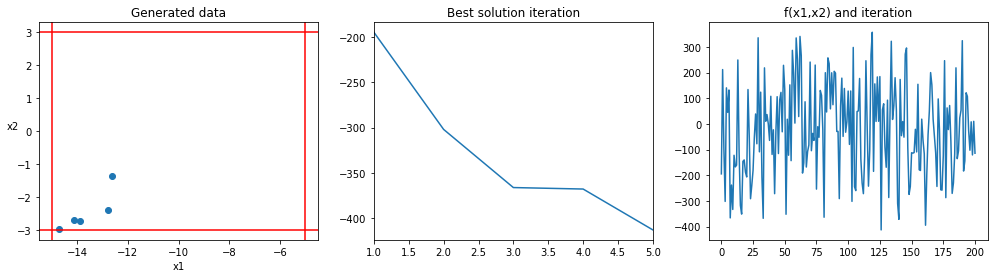

global minimum: -413.1544
(x1, x2):(-12.625515825040743,-1.353002770922064)
Program run time: 0.611(sec)


In [2]:
class SA_if_out_of_range_init():
    
    def __init__(self, t, Best_solution, x1_range, x2_range, result_arr, y_arr):
        self.t = t
        self.Best_solution = Best_solution
        self.x1_range = x1_range
        self.x2_range = x2_range
        self.result_arr = result_arr
        self.y_arr = y_arr
        
    def function(self, x1, x2):
        x1_square = x1**2
        x1_10_square = (x1 + 10) **2
        fx = 100*(x2 - 0.01*x1_square + 1) + 0.01* x1_10_square
        return round(fx,4)

    def temp_update(self, t):
        t *= 1 - np.sin(t)
        return t
    
    def decay_rate_sigmoid(self, iter_):
        r = 1 - (1/(1 + np.exp(iter_)))
        return r
    
    def new_candidtate(self, x1, x2, iter_):
    
        new_x1 = x1 + np.random.randn() * self.decay_rate_sigmoid(iter_)
        new_x2 = x2 + np.random.randn() * self.decay_rate_sigmoid(iter_)
        #如果超出範圍，則重新產生新點
        if (new_x1 not in self.x1_range) or (new_x2 not in self.x2_range): 
            new_x1 = rand.uniform(-15,-5)
            new_x2 = rand.uniform(-3,3)
        return new_x1, new_x2
    
    def store_or_pass(self, x1, x2):
        y = self.function(x1, x2)
        self.y_arr = np.append(y_arr, y)
        if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):
            self.Best_solution = y
            self.result_arr= np.append(self.result_arr,[x1,x2, self.Best_solution])
        else:
            pass
        return self.Best_solution, self.result_arr, self.y_arr

program_start = time.time()        
t = 1000
Best_solution = float('inf') 
iter_ = 200
result_arr = np.array([])
y_arr = np.array([])
x1_range = range(-15, -5)
x2_range = range(-3, 3)

x1 = rand.uniform(-15,-5)
x2 = rand.uniform(-3,3)
sa = SA_if_out_of_range_init(t, Best_solution, x1_range, x2_range, result_arr, y_arr)
Best_solution, result_arr, y_arr = sa.store_or_pass(x1, x2)
t = sa.temp_update(t)

iter_ -= 1
while t >= 0 and iter_ >= 0:
    x1, x2 = sa.new_candidtate(x1,x2,iter_)
    Best_solution, result_arr, y_arr = sa.store_or_pass(x1, x2)
    t = sa.temp_update(t)
    iter_ -= 1
else:  
    result_arr = result_arr.reshape(int(len(result_arr)/3),3)
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
    ax1.scatter(result_arr[:,0], result_arr[:,1])
    ax1.set_title('Generated data')
    ax1.set_xlabel('x1')
    ax1.axvline(-15, c = 'red')
    ax1.axvline(-5, c = 'red')
    ax1.axhline(-3, c = 'red')
    ax1.axhline(3, c = 'red')
    ax1.set_ylabel('x2', rotation = 0)
    ax2.set_title('Best solution iteration')
    ax3.set_title('f(x1,x2) and iteration')
    ax3.plot(y_arr)    
    ax2.plot(range(1,len(result_arr) + 1),result_arr[:,2])
    ax2.axis(xmin = 1, xmax = len(result_arr))
    plt.show() 
    print(f'global minimum: {min(result_arr[:,2])}')
    print(f'(x1, x2):({float(result_arr[np.where(min(result_arr[:,2]))][:,0])},{float(result_arr[np.where(min(result_arr[:,2]))][:,1])})')
program_end = time.time()        
print(f'Program run time: {round(program_end - program_start, 3)}(sec)')

### SA when x1 or x2 超過範圍時則停止

In [3]:
# class SA_if_out_of_range_stop():
    
#     def __init__(self, t, Best_solution, x1_range, x2_range, result_arr, y_arr):
#         self.t = t
#         self.Best_solution = Best_solution
#         self.x1_range = x1_range
#         self.x2_range = x2_range
#         self.result_arr = result_arr
#         self.y_arr = y_arr
        
#     def function(self, x1, x2):
#         fx = 100*(x2 + (-0.01*(x1**2)) + 1) + 0.01*(x1+10)**2
#         return fx

#     def temp_update(self, t):
#         t *= 1 - np.sin(t)
#         return t
    
#     def decay_rate_sigmoid(self, iter_):
#         r = 1 - (1/(1 + np.exp(iter_)))
#         return r
    
#     def new_candidtate(self, x1, x2, iter_):
    
#         new_x1 = x1 + np.random.randn(1) * self.decay_rate_sigmoid(iter_)
#         new_x2 = x2 + np.random.randn(1) * self.decay_rate_sigmoid(iter_)
#         return new_x1, new_x2
    
#     def store_or_pass(self, x1, x2):
#         y = self.function(x1, x2)
#         self.y_arr = np.append(y_arr, y)
#         if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):
#             self.Best_solution = y
#             self.result_arr= np.append(self.result_arr,[x1,x2, self.Best_solution])
#         else:
#             pass
#         return self.Best_solution, self.result_arr, self.y_arr

# program_start = time.time()        
# t = 100
# Best_solution = float('inf') 
# iter_ = 20
# result_arr = np.array([])
# y_arr = np.array([])
# x1_range = range(-15, -5)
# x2_range = range(-3, 3)

# x1 = rand.uniform(-15,-5)
# x2 = rand.uniform(-3,3)
# sa_stop = SA_if_out_of_range_stop(t, Best_solution, x1_range, x2_range, result_arr, y_arr)
# Best_solution, result_arr, y_arr = sa_stop.store_or_pass(x1, x2)
# t = sa_stop.temp_update(t)
# iter_ -= 1
# break_flag = False  # 初始化標誌
# print(x1,x2)


# while t > 0 and iter_ > 0:
#     x1, x2 = sa_stop.new_candidtate(x1,x2,iter_)
#     print(x1,x2)
#     if (x1 in sa_stop.x1_range) or (x2 in sa_stop.x2_range): 
#         Best_solution, result_arr, y_arr = sa_stop.store_or_pass(x1, x2)
#         x1, x2 = sa_stop.new_candidtate(x1, x2, iter_)
#         t = sa_stop.temp_update(t)
#         iter_ -= 1
#         x1, x2 = sa_stop.new_candidtate(x1, x2, iter_)
#     else:
#         print('超過範圍。程式停止運行')
#         t = -1
#         iter_ =-1
#         break_flag = True
# if break_flag == True:
#     result_arr = result_arr.reshape(int(len(result_arr)/3),3)
#     fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
#     ax1.scatter(result_arr[:,0], result_arr[:,1])
#     ax1.set_title('Generated data')
#     ax1.set_xlabel('x1')
#     ax1.axvline(-15, c = 'red')
#     ax1.axvline(-5, c = 'red')
#     ax1.axhline(-3, c = 'red')
#     ax1.axhline(3, c = 'red')
#     ax1.set_ylabel('x2', rotation = 0)
#     ax2.set_title('Best solution iteration')
#     ax3.set_title('f(x1,x2) and iteration')
#     ax3.plot(y_arr)    
#     ax2.plot(range(1,len(result_arr) + 1),result_arr[:,2])
#     ax2.axis(xmin = 1, xmax = len(result_arr))
#     plt.show() 
#     print(f'global minimum: {min(result_arr[:,2])}')
#     print(f'(x1, x2):({float(result_arr[np.where(min(result_arr[:,2]))][:,0])},{float(result_arr[np.where(min(result_arr[:,2]))][:,1])})')
#     program_end = time.time()        
#     print(f'Program run time: {round(program_end - program_start, 3)}(sec)')